## Name: Nguyen Minh Huy Duong
### Assignment 1

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset
dataset = pd.read_csv('used_cars_data.csv')
dataset.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


### 1. Data cleaning
Please remove the following columns: "S.No" and "New_Price" \
Please create "Car_Age" feature which is defined as the difference between the current year and the year the car was built. E.g. "Car_Age" for the first record is 14 \
There are two records for Electric vehicles. The crresponding mileage columns are empty. Please search internet what will be the reasonable value and fill out it. Please provide the logics with the reference.

In [3]:
# Remove the "S.No." and "New_Price" columns
dataset.drop(labels=["S.No.", "New_Price"], axis=1, inplace=True)
dataset.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [4]:
# Create "Car_Age" column
from datetime import datetime
current_year = datetime.now().year
dataset["Car_Age"] = current_year - dataset["Year"]
dataset.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,11


In [5]:
# Find the 2 vehicle with missing Mileage
dataset.query('Mileage != Mileage')

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00,8
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75,13


According to carwale.com (https://www.carwale.com/mahindra-cars/verito/15-d4-bs-iv/#:~:text=Mahindra%20Verito%201.5%20D4%20BS%2DIV%20Summary&text=7.70%20Lakh.,a%20mileage%20of%2021%20kmpl.) the Mileage of Mahindra E Verito D4 is 21kmpl \
According to fueleconomy.gov (https://www.fueleconomy.gov/feg/Find.do?action=sbs&id=30919) the Mileage of Toyota Prius 2011 is 48 MPG equal to 20.41 kmpl \
All the car as same model and year should have similar Mileage

In [6]:
new_mileage = [[4446, "21 kmpl"], [4904, "20.41 kmpl"]]
for data in new_mileage:
    dataset.loc[data[0], 'Mileage'] = data[1]
dataset.query('Fuel_Type == "Electric"')

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,21 kmpl,72 CC,41 bhp,5.0,13.00,8
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,20.41 kmpl,1798 CC,73 bhp,5.0,12.75,13


### 2. Transformation
Among the columns in the dataset, python datatype of the "Mileage", "Engine", "Power" columns are "object". \
Please convert them to numerical datatype. Remove unit and convert string to numerical value (floating point or integer)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7253 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  Price              6019 non-null   float64
 12  Car_Age            7253 non-null   int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 736.8+ KB


In [8]:
# Split Mileage, Engine and Power column into pair of column Value and Unit
temp_dataset = dataset.copy()
temp_dataset[['Mileage Value', 'Mileage Unit']] = temp_dataset['Mileage'].str.extract(r'([0-9\.]+)\s*(\w+/?\w*)')
temp_dataset[['Engine Value', 'Engine Unit']] = temp_dataset['Engine'].str.extract(r'([0-9\.]+)\s*(\w+/?\w*)')
temp_dataset[['Power Value', 'Power Unit']] = temp_dataset['Power'].str.extract(r'([0-9\.]+)\s*(\w+/?\w*)')
temp_dataset.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Mileage Value,Mileage Unit,Engine Value,Engine Unit,Power Value,Power Unit
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,14,26.6,km/kg,998,CC,58.16,bhp
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,9,19.67,kmpl,1582,CC,126.2,bhp
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,13,18.2,kmpl,1199,CC,88.7,bhp
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,12,20.77,kmpl,1248,CC,88.76,bhp
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,11,15.2,kmpl,1968,CC,140.8,bhp


In [9]:
temp_dataset['Mileage Unit'].value_counts()

Mileage Unit
kmpl     7179
km/kg      74
Name: count, dtype: int64

In [10]:
temp_dataset['Engine Unit'].value_counts()

Engine Unit
CC    7207
Name: count, dtype: int64

In [11]:
temp_dataset['Power Unit'].value_counts()

Power Unit
bhp    7078
Name: count, dtype: int64

From the result only Mileage have more than 1 type of Unit which are "kmpl" and "km/kg" \
Since the number of data in "kmpl" is way more than "km/kg", we will convert the data into "kmpl" to minimize the number of calculation

In [12]:
# for idx, row in temp_dataset.iterrows():
#     if row['Mileage Unit'] == 'km/kg':
#         dataset.loc[idx, 'Mileage'] = float(row['Mileage Value'])*1.4
#     else:
#         dataset.loc[idx, 'Mileage'] = float(row['Mileage Value'])
#     dataset.loc[idx, 'Engine'] = int(row['Engine Value']) if row['Engine Value'] is not None  else row['Engine Value']
#     dataset.loc[idx, 'Power'] = float(row['Power Value']) if row['Power Value'] is not None else row['Power Value']

dataset['Mileage'] = np.where(temp_dataset['Mileage Unit'] == 'km/kg',
                              temp_dataset['Mileage Value'].astype(float) * 1.4,
                              np.nan)

dataset['Engine'] = np.where(pd.notnull(temp_dataset['Engine Value']), 
                             temp_dataset['Engine Value'].astype(float), 
                             np.nan)

dataset['Power'] = np.where(pd.notnull(temp_dataset['Power Value']), 
                             temp_dataset['Power Value'].astype(float), 
                             np.nan)


dataset.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,NaN,1582.0,126.20,5.0,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,NaN,1199.0,88.70,5.0,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,NaN,1248.0,88.76,7.0,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,NaN,1968.0,140.80,5.0,17.74,11


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            74 non-null     float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  Price              6019 non-null   float64
 12  Car_Age            7253 non-null   int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 736.8+ KB


### 3. Outlier dection and box-plot
Please check whether the data is in normal distribution or non-normal distribution for the following numerical columns: "Car_Age", "Kilometer_Driven", "Mileage", "Engine", "Power", "Seats", "Price" \
Please detect outliers based on the data distribution type. For outlier detection, please calculate step by step. Please count(print) how many outliers for each column. \
Please draw box-plot for the columns. Please draw box-plot together if the scales of the columns are in similar range. Otherwise, please draw box-plot separately. \ 
Please draw box-plot for 'Mileage' with 'Fuel_Type'

In [14]:
# Calculate the mean and standard deviation of each column
col_list = ["Car_Age", "Kilometers_Driven", "Mileage", "Engine", "Power", "Seats", "Price"]
summary_stats = pd.DataFrame({
    'Mean': dataset[col_list].mean(),
    "Std": dataset[col_list].std()
})
summary_stats


,Mean,Std
Car_Age,10.634634,3.254421
Kilometers_Driven,58699.063146,84427.720583
Mileage,34.091514,9.206102
Engine,1616.573470,595.285137
Power,112.765214,53.493553
Seats,5.279722,0.811660
Price,9.479468,11.187917


In [15]:
dataset["Car_Age"].describe()

count    7253.000000
mean       10.634634
std         3.254421
min         5.000000
25%         8.000000
50%        10.000000
75%        13.000000
max        28.000000
Name: Car_Age, dtype: float64

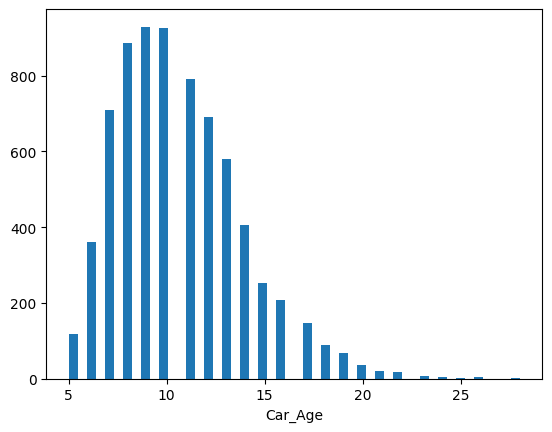

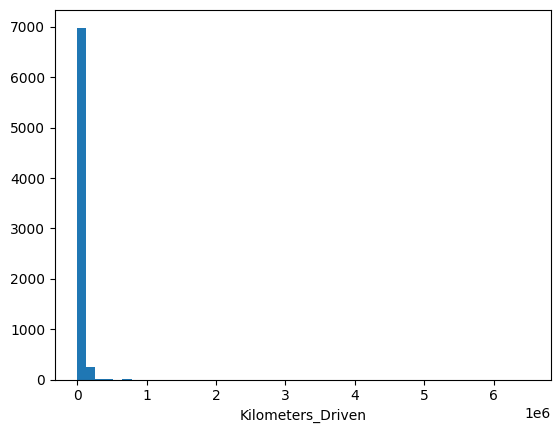

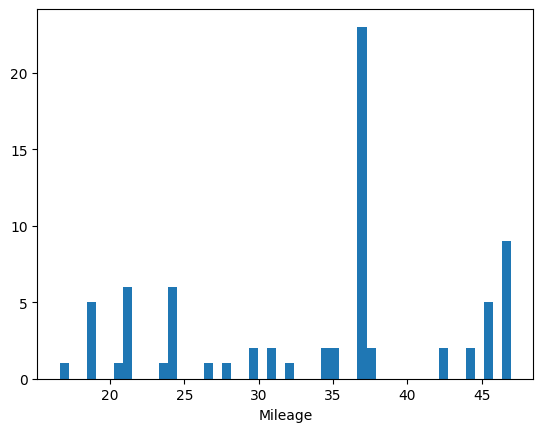

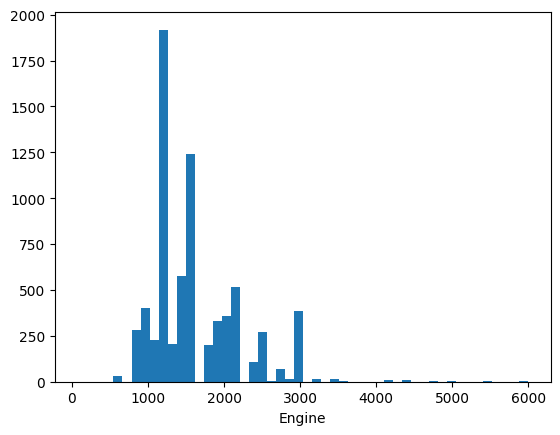

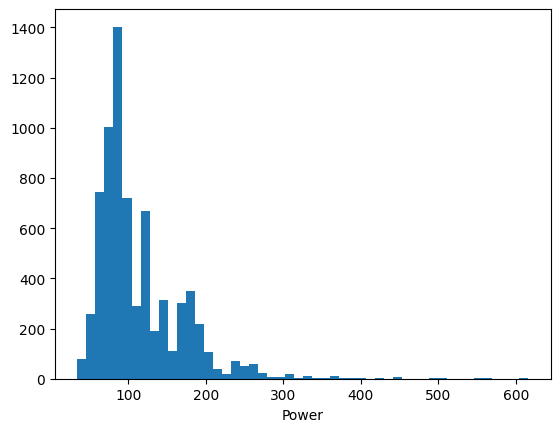

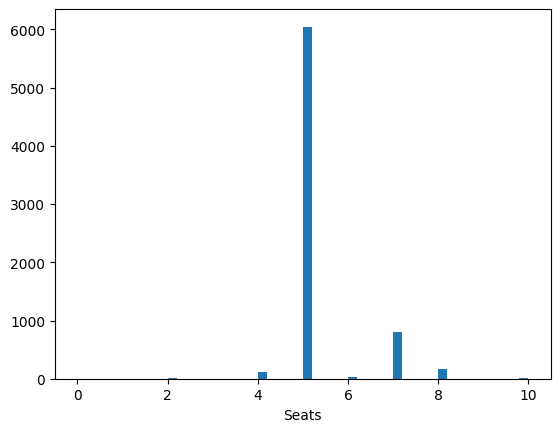

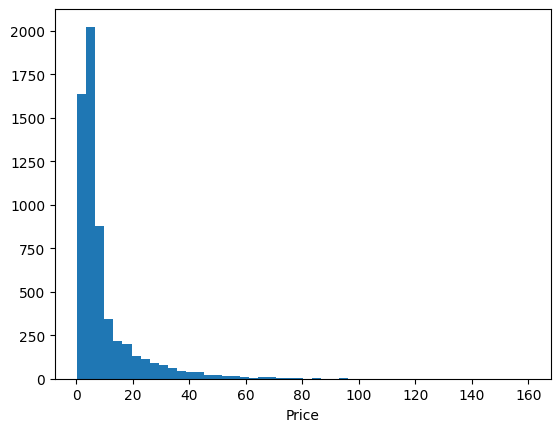

In [16]:
from math import sqrt
for col in col_list:
    bin = (dataset[col].max() - dataset[col].min()) / sqrt(dataset[col].count())
    plt.hist(dataset[col], bins=50)
    plt.xlabel(col)
    plt.show()